## E3 Fundamentals of Visualization libraries Part 1 ß Matplotlib

### Import Libraries

In [3]:
import pandas as pd
from matplotlib import pyplot as plt
import numpy as np
from datetime import datetime as dt

In [4]:
import matplotlib
matplotlib.__version__

'3.9.2'

### Read in the dataset

In [6]:
df = pd.read_csv('NewYork_data.csv', index_col = 0)

In [7]:
df.columns

Index(['ride_id', 'rideable_type', 'started_at', 'ended_at',
       'start_station_name', 'start_station_id', 'end_station_name',
       'end_station_id', 'start_lat', 'start_lng', 'end_lat', 'end_lng',
       'member_casual', 'date', 'avgTemp', '_merge'],
      dtype='object')

In [8]:
df.drop(columns = {'_merge'}, inplace = True)

In [9]:
df.head()

,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual,date,avgTemp
0,3255D3E3F33CDC45,classic_bike,2022-03-18 15:38:17,2022-03-18 15:45:34,Mama Johnson Field - 4 St & Jackson St,HB404,South Waterfront Walkway - Sinatra Dr & 1 St,HB103,40.743140,-74.040041,40.736982,-74.027781,casual,2022-03-18,13.9
1,17FA5604A37338F9,electric_bike,2022-03-04 16:44:48,2022-03-04 16:50:45,Baldwin at Montgomery,JC020,Grove St PATH,JC005,40.723659,-74.064194,40.719586,-74.043117,member,2022-03-04,-1.9
2,7DEC9ADDB8D6BBE1,electric_bike,2022-03-13 17:44:32,2022-03-13 17:54:44,Baldwin at Montgomery,JC020,Grove St PATH,JC005,40.723659,-74.064194,40.719586,-74.043117,member,2022-03-13,-2.3
3,9D69F74EEF231A2E,classic_bike,2022-03-13 15:33:47,2022-03-13 15:41:22,Baldwin at Montgomery,JC020,Grove St PATH,JC005,40.723659,-74.064194,40.719586,-74.043117,member,2022-03-13,-2.3
4,C84AE4A9D78A6347,classic_bike,2022-03-11 12:21:18,2022-03-11 12:33:24,Baldwin at Montgomery,JC020,Grove St PATH,JC005,40.723659,-74.064194,40.719586,-74.043117,member,2022-03-11,7.2


In [10]:
df.shape

(1388898, 15)

In [11]:
df.dtypes

ride_id                object
rideable_type          object
started_at             object
ended_at               object
start_station_name     object
start_station_id       object
end_station_name       object
end_station_id         object
start_lat             float64
start_lng             float64
end_lat               float64
end_lng               float64
member_casual          object
date                   object
avgTemp               float64
dtype: object

In [12]:
df['date'] = pd.to_datetime(df['date'])

In [13]:
df.dtypes

ride_id                       object
rideable_type                 object
started_at                    object
ended_at                      object
start_station_name            object
start_station_id              object
end_station_name              object
end_station_id                object
start_lat                    float64
start_lng                    float64
end_lat                      float64
end_lng                      float64
member_casual                 object
date                  datetime64[ns]
avgTemp                      float64
dtype: object

### Plotting with pandas

In [15]:
# First, you need to set the date column to be the index of the dataframe.
df.set_index('date', inplace=True)

In [16]:
df.sort_index(inplace = True)

In [17]:
df.head()

,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual,avgTemp
date,,,,,,,,,,,,,,
2021-06-01,24EBE26F44813766,electric_bike,2021-06-01 20:12:04,2021-06-01 20:32:25,Grand St,JC102,Leonard Gordon Park,JC080,40.715177,-74.037683,40.745910,-74.057271,member,NaN
2021-06-01,238146615653C5FE,docked_bike,2021-06-01 21:05:16,2021-06-01 21:19:32,Newport Pkwy,JC008,Jersey & 3rd,JC074,40.728744,-74.032108,40.723332,-74.045953,member,NaN
2021-06-01,67083FAE3B9F30C8,docked_bike,2021-06-01 21:55:33,2021-06-01 23:04:34,South Waterfront Walkway - Sinatra Dr & 1 St,HB103,South Waterfront Walkway - Sinatra Dr & 1 St,HB103,40.736982,-74.027780,40.736982,-74.027781,casual,NaN
2021-06-01,2F1C3C1670DE6B32,electric_bike,2021-06-01 12:50:46,2021-06-01 13:05:48,Columbus Park - Clinton St & 9 St,HB501,Manila & 1st,JC082,40.748161,-74.032453,40.721651,-74.042884,member,NaN
2021-06-01,C3F4D7B17B3FA702,docked_bike,2021-06-01 08:44:35,2021-06-01 08:48:22,Columbus Drive,JC014,Paulus Hook,JC002,40.718355,-74.038914,40.714145,-74.033552,member,NaN


<Axes: xlabel='date'>

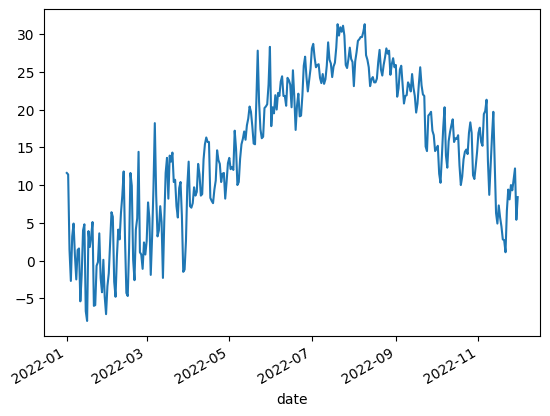

In [18]:
df['avgTemp'].plot()

### Procedural approach

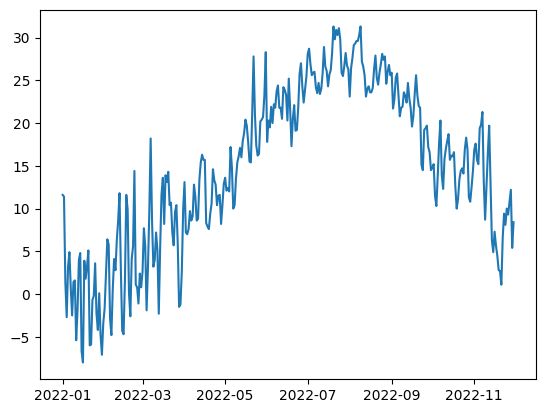

In [20]:
plt.plot(df['avgTemp'])
plt.show()

#### The line is cramped due to the size of the chart. For better interpretability, expand the width of the figure and give the title for the chart.

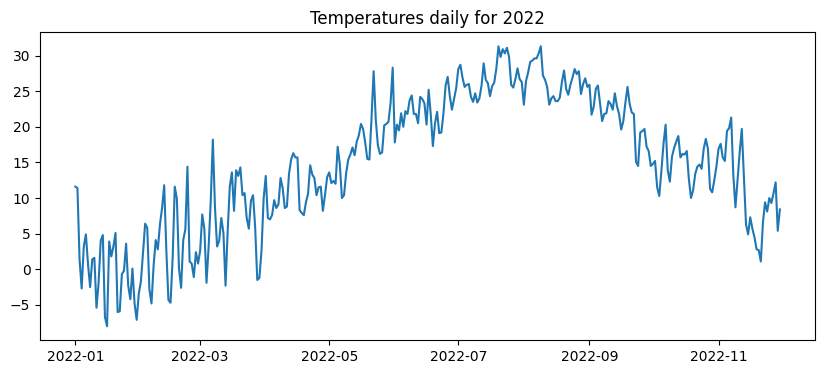

In [22]:
plt.figure(figsize=(10,4))
plt.title('Temperatures daily for 2022')
plt.plot(df['avgTemp'])
plt.show()

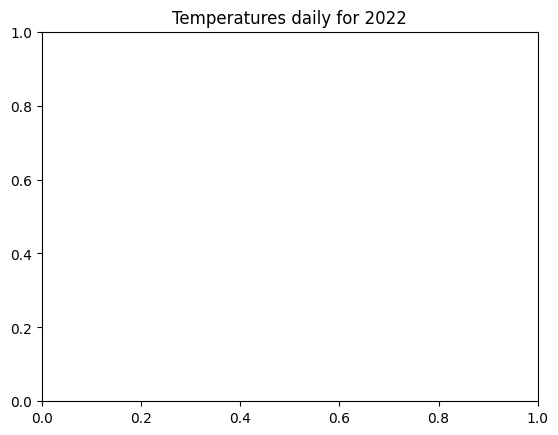

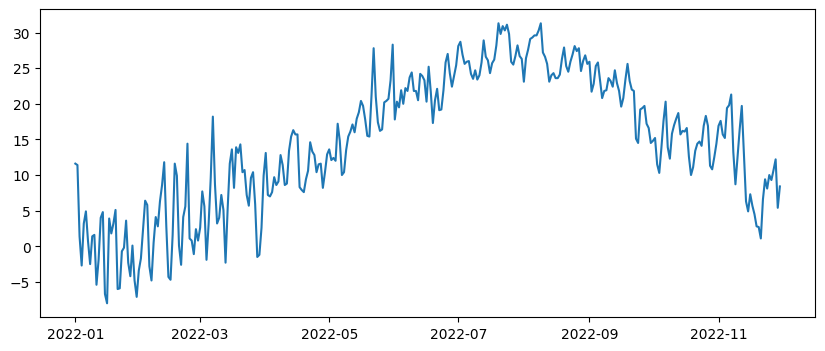

In [23]:
plt.title('Temperatures daily for 2022')
plt.figure(figsize=(10,4))
plt.plot(df['avgTemp'])
plt.show()

### Aggregrate rides

#### -Make a groupby function using ride_id for each day to get an aggregated count of rides per day.
#### -Merging this back to the main dataframe.

In [26]:
df.columns

Index(['ride_id', 'rideable_type', 'started_at', 'ended_at',
       'start_station_name', 'start_station_id', 'end_station_name',
       'end_station_id', 'start_lat', 'start_lng', 'end_lat', 'end_lng',
       'member_casual', 'avgTemp'],
      dtype='object')

In [27]:
# Groupby the count of the trips 

df_group = pd.DataFrame(df.groupby(['date'])['ride_id'].count()).reset_index()

In [28]:
df_group.head()

,date,ride_id
0,2021-06-01,2024
1,2021-06-02,1956
2,2021-06-03,1285
3,2021-06-04,1693
4,2021-06-05,2771


In [29]:
# group by counts of the trips
df_group.rename(columns = {'ride_id':'bike_rides_daily'}, inplace = True)
df = df.merge(df_group, on = "date", how = 'outer', indicator = True)
print(df['_merge'].value_counts(dropna = False))
print("Shape of January 1st is", df[df['date'] == '2021-06-01'].shape) # Check 
print("Shape of January 2nd is", df[df['date'] == '2021-06-02'].shape) # Second check 

df = df.set_index('date')

print(df.columns)

_merge
both          1388898
left_only           0
right_only          0
Name: count, dtype: int64
Shape of January 1st is (2024, 17)
Shape of January 2nd is (1956, 17)
Index(['ride_id', 'rideable_type', 'started_at', 'ended_at',
       'start_station_name', 'start_station_id', 'end_station_name',
       'end_station_id', 'start_lat', 'start_lng', 'end_lat', 'end_lng',
       'member_casual', 'avgTemp', 'bike_rides_daily', '_merge'],
      dtype='object')


In [30]:
df.head()

,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual,avgTemp,bike_rides_daily,_merge
date,,,,,,,,,,,,,,,,
2021-06-01,24EBE26F44813766,electric_bike,2021-06-01 20:12:04,2021-06-01 20:32:25,Grand St,JC102,Leonard Gordon Park,JC080,40.715177,-74.037683,40.745910,-74.057271,member,NaN,2024,both
2021-06-01,238146615653C5FE,docked_bike,2021-06-01 21:05:16,2021-06-01 21:19:32,Newport Pkwy,JC008,Jersey & 3rd,JC074,40.728744,-74.032108,40.723332,-74.045953,member,NaN,2024,both
2021-06-01,67083FAE3B9F30C8,docked_bike,2021-06-01 21:55:33,2021-06-01 23:04:34,South Waterfront Walkway - Sinatra Dr & 1 St,HB103,South Waterfront Walkway - Sinatra Dr & 1 St,HB103,40.736982,-74.027780,40.736982,-74.027781,casual,NaN,2024,both
2021-06-01,2F1C3C1670DE6B32,electric_bike,2021-06-01 12:50:46,2021-06-01 13:05:48,Columbus Park - Clinton St & 9 St,HB501,Manila & 1st,JC082,40.748161,-74.032453,40.721651,-74.042884,member,NaN,2024,both
2021-06-01,C3F4D7B17B3FA702,docked_bike,2021-06-01 08:44:35,2021-06-01 08:48:22,Columbus Drive,JC014,Paulus Hook,JC002,40.718355,-74.038914,40.714145,-74.033552,member,NaN,2024,both


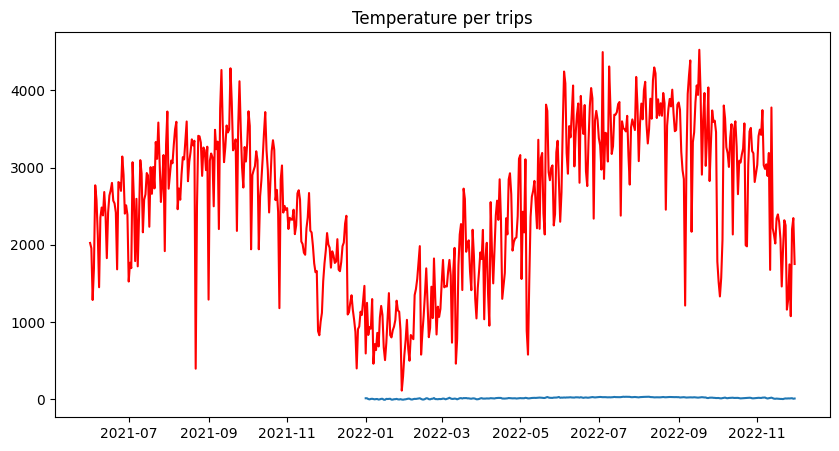

In [31]:
plt.figure(figsize=(10,5))
plt.title('Temperature per trips')
plt.plot(df['avgTemp'])
plt.plot(df['bike_rides_daily'], color = 'red')
plt.show()

# The code above is very similar to the one used for the temperature line chart. The main difference is that a second instance of plt.plot() has been included, adding another line to the same chart! You’ve also specified that you want this line to be red

### OO Approach

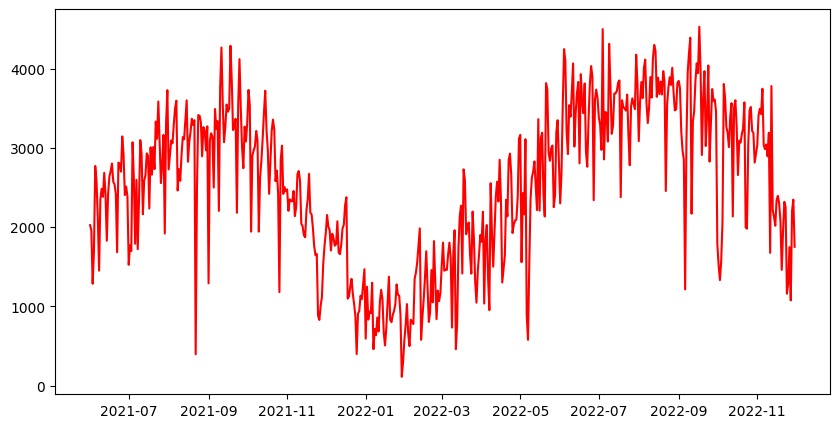

In [33]:
# Create figure and axis objects with subplots()

fig,ax = plt.subplots(figsize=(10, 5))

# Make a plot of the bike rides
ax.plot(df['bike_rides_daily'],color = "red")

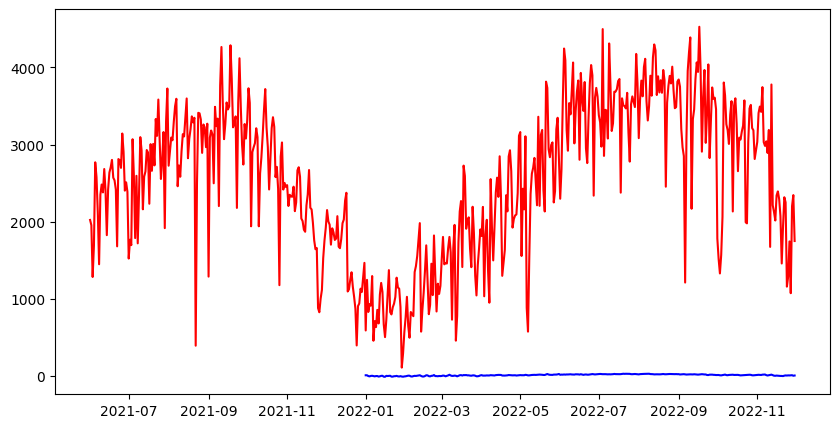

In [34]:
# Create figure and axis objects with subplots()

fig,ax = plt.subplots(figsize=(10, 5))

# Make a plot of the bike rides
ax.plot(df['bike_rides_daily'],color = "red")
ax.plot(df['avgTemp'], color = 'blue')

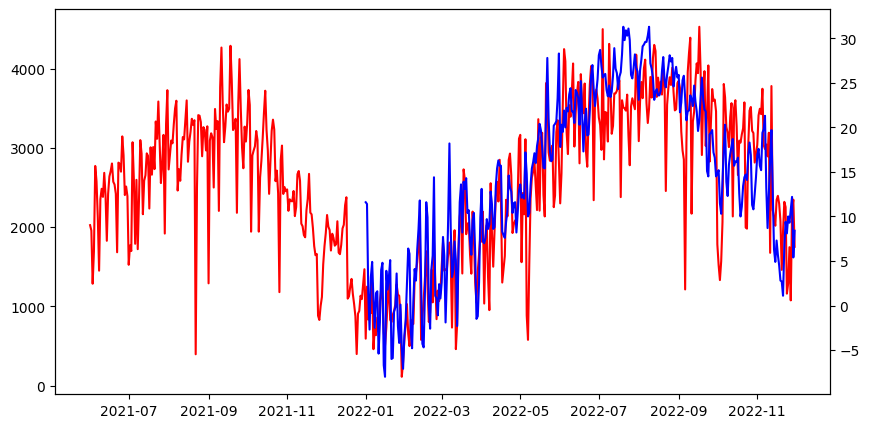

In [35]:
# Create figure and axis objects with subplots()

fig,ax = plt.subplots(figsize=(10, 5))

# Make a plot of the bike rides
ax.plot(df['bike_rides_daily'],color = "red")

# Here is where we create the dual axis - initialize a twin object for two different y-axis on the sample plot
ax2 = ax.twinx()

# Make a plot with the temperatues on the y-axis using second axis object
ax2.plot(df["avgTemp"], color = "blue")
plt.show()

### Final Dual Plot

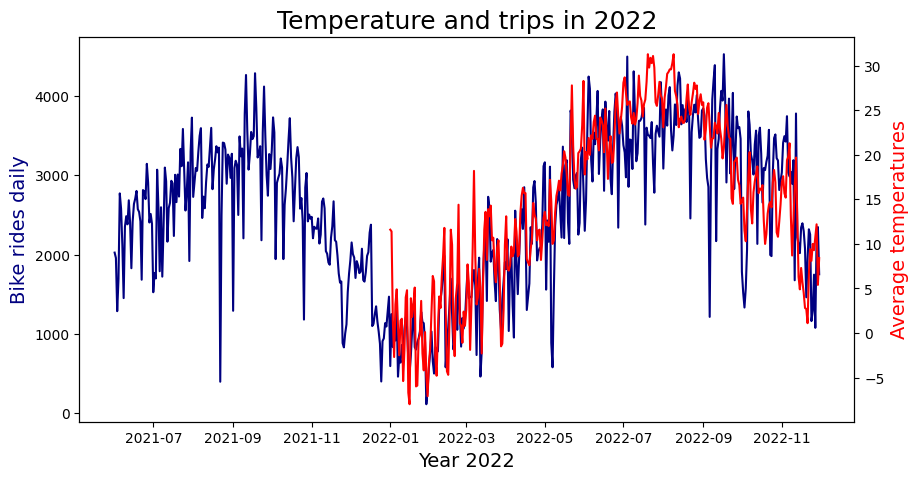

In [37]:
# Create figure and axis objects with subplots() and details

fig,ax = plt.subplots(figsize=(10, 5))

# Make a plot of the bike rides
ax.plot(df['bike_rides_daily'],color = "navy")
ax.set_xlabel("Year 2022", fontsize = 14) # set x-axis label
ax.set_ylabel("Bike rides daily",color = "navy", fontsize = 14) # set y-axis label

# Here is where we create the dual axis - initialize a twin object for two different y-axis on the sample plot
ax2 = ax.twinx()

# Make a plot with the temperatues on the y-axis using second axis object
ax2.plot(df["avgTemp"], color = "red")
ax2.set_ylabel("Average temperatures", color = "red",fontsize=14)
plt.title('Temperature and trips in 2022', fontsize = 18)
plt.show()

## Matplotlib Line Plots with Twin Axes
- To create a line plot with twin axes, we need to use the twinx() function. 
- This function creates a new y-axis that shares the same x-axis as the original plot. 
- We can see on the X-axis, the year 2022 acts as a common axis for temperatues and bike rides daily.
- To represent two variables with different scales on the same plot, using twin axes is an effective way to visualize the relationship between the variables without losing the clarity of the individual scales. 

In [39]:
plt.style.use('ggplot')

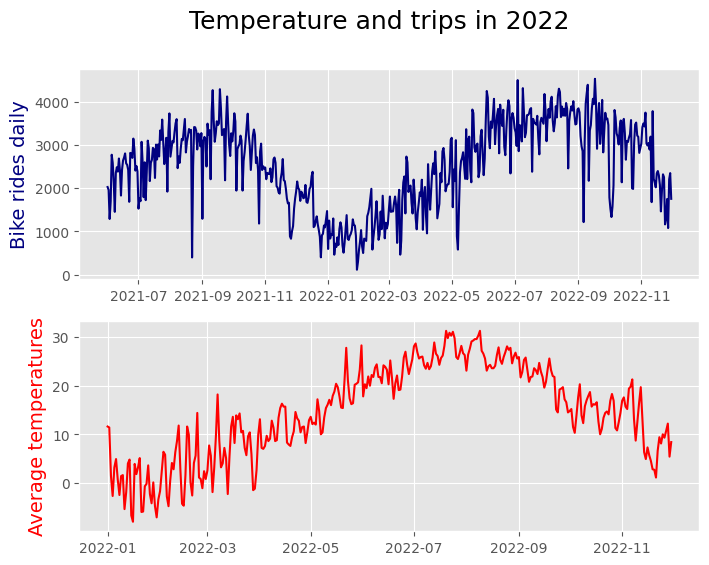

In [40]:
# Create figure and axis objects with subplots() and details

fig,ax = plt.subplots(2, figsize =(8, 6))

# Make a plot of the bike rides
ax[0].plot(df['bike_rides_daily'],color = "navy")
ax[0].set_ylabel("Bike rides daily",color = "navy", fontsize = 14) # set y-axis label

# Make a plot with the temperatues on the y-axis using second axis object
ax[1].plot(df["avgTemp"], color = "red")
ax[1].set_ylabel("Average temperatures", color = "red",fontsize=14)
plt.suptitle('Temperature and trips in 2022', fontsize = 18)

plt.show()

In [41]:
# save the plot as a file
fig.savefig('trips_temperatures_dual_line.jpg',
            format='jpeg',
            dpi=100,
            bbox_inches='tight')

## END